# 1. Housing price prediction using a simple LinearRegression model

In this mini-project, you will implement linear regression with data consisting of two features to predict the price of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

### 1.1. Loading the dataset
The file `housing-dataset.csv` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. The following Python code helps you load the dataset from the data file into the variables $X$ and $y$. Read the code and print a small subset of $X$ and $y$ to see what they look like.

In [2]:
import pandas as pd

df = pd.read_csv("datasets/housing-dataset.csv")

# X is a matrix of two column (corresponding to the two features: size, rooms)
X = df[ ["size", "rooms"] ]
X = X.values # Get X as a numpy array instead of a DataFrame

# y is the vector of outputs (corresponding to the price)
y = df["price"]
y = y.values # Get y as a numpy array instead of a DataFrame

#""" TODO:
#You can print a small subset of X and y to see what it looks like.
#"""
print("house features, X")
print(X[:10])
print()
print("prices, y")
for elem in range(10):
    print(y[elem])
print()
print(X.shape)
print(y.shape)

house features, X
[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]
 [1985    4]
 [1534    3]
 [1427    3]
 [1380    3]
 [1494    3]]

prices, y
399900
329900
369000
232000
539900
299900
314900
198999
212000
242500

(47, 2)
(47,)


### 1.2. Data normalization
By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When the values of different features differ a lot, performing feature scaling can make machine learning methods more effective. Your task here is to normalize the training data using `StandardScaler` from scikit-learn.

Once the features are normalized, you can do a scatter plot of the original dataset `X` (plotting the size of the house vs. number of rooms) and another scatter plot of the normalized dataset `X_normalized`. You will notice that the normalized dataset still have the same shape as the original one; the difference is that the new values of the two features (size and number of rooms) are more or less similar.

For more information about data scaling in scikit-learn, you can check the link: https://scikit-learn.org/stable/modules/preprocessing.html


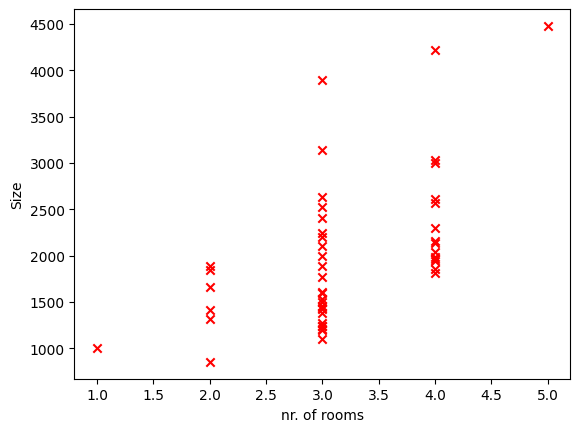

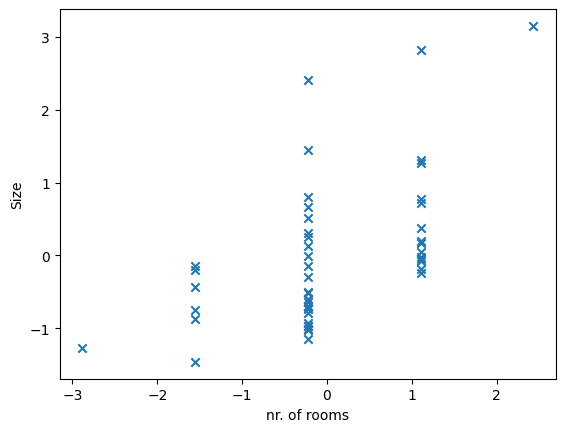

In [3]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt

#""" TODO:
#Complete the following code to compute a normalized version of X called: X_normalized
 #"""
scaler = StandardScaler()
scaler.fit(X)

# X_normalized = ... # Normalize X with the scaler you created
X_normalized = scaler.transform(X)

#""" TODO: Do a scatter plot of the original dataset X (plotting Size vs Rooms) """

plt.scatter(X[:, 1], X[:, 0], color="red", marker="x")
plt.ylabel("Size")
plt.xlabel("nr. of rooms")
plt.show()

#""" TODO: Do a scatter plot of the normalized dataset X_normalized (plotting Size vs Rooms) """

plt.scatter(X_normalized[:, 1], X_normalized[:, 0], marker="x")
plt.ylabel("Size")
plt.xlabel("nr. of rooms")
plt.show()

### 1.3. Linear Regression with scikit-learn (sklearn)
You will now use the scikit-learn library to train a simple linear regression model on your normalized training dataset.

In [4]:
from sklearn.linear_model import LinearRegression

""" TODO:
Train the linear regression model on the scaled training data
"""
reg = LinearRegression() 
reg.fit(X_normalized, y)

LinearRegression()

Next, use your trained regression model to predict the price of new test houses (described in the comment below). Do not forget to normalize the test data (by transforming it) before making predictions.

In [5]:
""" TODO: 
Use the trained regression model to predict the price of the following test houses
* 1650-square-foot house with 3 bedrooms
* 1020-square-foot house with 2 bedrooms
* 2300-square-foot house with 4 bedrooms
"""

import numpy as np

# TODO: Create the test dataset X_test
X_test = [
    [1650, 3], 
    [1020, 2], 
    [2300, 4],
]

# Scale the test dataset using scaler.transform(...)
X_test_normalized = scaler.transform(X_test)

# Predict the prices using reg.predict(...)
y_pred = reg.predict(X_test_normalized)

n = 1
for elem in range(3):
    print("Predicted price for house", n, "-->", y_pred[elem], "USD.")
    n = n + 1

Predicted price for house 1 --> 293081.4643348962 USD.
Predicted price for house 2 --> 214116.75881611995 USD.
Predicted price for house 3 --> 374830.3833340249 USD.


# 2. Housing price prediction with LinearRegression & KNeighborsRegressor

In this part, you will train two regression models: (1) using a simple `LinearRegression` model, and (2) using a `KNeighborsRegressor` model. Then you will compare the performance of the two models using the `mean_squared_error` (on a test dataset).

### 2.1. Loading the dataset
We will use the same house pricing dataset as previously. The following code simply loads again the dataset from the data file into the variables `X` and `y`.

In [6]:
df = pd.read_csv("datasets/housing-dataset.csv")
X = df[ ["size", "rooms"] ].values
y = df["price"].values

print(f"*** Shape of X is {X.shape}\n*** Shape of y is {y.shape}")

*** Shape of X is (47, 2)
*** Shape of y is (47,)


### 2.2. Split the dataset into a training part and a testing part
First, let's randomly split our dataset into training and testing parts. The test dataset will later serve as a way to evaluate how well our trained models will perform on new unseen data (when deployed in real-world). Splitting is easy to do in scikit-learn using the `train_test_split` function. 

For more information about the `train_test_split` function, you can check the example code on the official documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [10]:
from sklearn.model_selection import train_test_split

""" TODO:
Call the train_test_split(...) function to split X into X_train and X_test, and y into y_train and y_test.
The train_test_split(...) function takes as arguments the input data X, the corresponding labels y, and 
a float test_size specifying the percentage our data to keep in the test set. Please keep 30% of the data 
for test (i.e. test_size=0.3). You can also check the documentation for more information.
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("Full data:", X.shape, y.shape)
print("Train data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)


Full data: (47, 2) (47,)
Train data: (32, 2) (32,)
Test data: (15, 2) (15,)


### 2.3. Normalizing the data
Now let's fit a `StandardScaler` to our training data (`X_train`), then use it to scale (transform) the training data.

Note that you should fit the scaler on the training data only, not on the test data. The test data is not supposed to be known during training, it will only be used later to evaluate the performance of the trained model.

In [13]:
""" TODO:
Use StandardScaler to normalize your training data.
"""

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# TODO: fit scaler to the training data

scaler.fit(X_train)

# TODO: use the scaler to transform the training data

X_train_normalized = scaler.transform(X_train)


### 2.3. Train two regression models

Now we your task is to train two regression models. The first one (called `reg1`) is a `LinearRegression` model, and the second one (called `reg2`) is a `KNeighborsRegressor` model. 
These two models should be trained on the normalized training dataset (`X_train_normalized`, `y_train`).

For `KNeighborsRegressor`, you can set the number of neighbors ($K$) to a number of your choice (e.g. `n_neighbors=5`).

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

""" TODO:
Create the 1st model (called reg1) and train it.
"""
reg1 = LinearRegression()
reg1.fit(X_train_normalized, y_train)


""" TODO:
Create the 2nd model (called reg2) and train it.
"""
reg2 = KNeighborsRegressor(5)
reg2.fit(X_train_normalized, y_train)


KNeighborsRegressor()

### 2.4. Evaluate the performance of the two regression models
Now it is time to evaluate the performance of the two models (`reg1`, and `reg2`) on the test data. Before making predictions using these two models, do not forget to normalize (i.e. scale, or transform) the test data.

To evaluate the performance of a model, you can compute the Mean Squared Error (MSE) using the function `mean_squared_error(...)`. This function takes as arguments the true labels and the predicted labels. For more information, see: 
- https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


In [20]:
from sklearn.metrics import mean_squared_error

""" TODO:
Normalize the test data.
Predict its corresponding outputs using each model: reg1 and reg2.
Use the MSE to evaluate the performance of the two models.
"""

scaler.fit(X_test)
X_test_normalized = scaler.transform(X_test)

y_test_pred1 = reg1.predict(X_test_normalized) # predicted outputs of the test set using reg1
y_test_pred2 = reg2.predict(X_test_normalized) # predicted outputs of the test set using reg2

err1 = mean_squared_error(y_test, y_test_pred1)
err2 = mean_squared_error(y_test, y_test_pred2)

print(f"{reg1} was better" if err1 < err2 else f"{reg2} was better")

LinearRegression() was better
